In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing as pp
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from statistics import mode
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import impute
import lightgbm as lgb

#Todas las librerías para los distintos algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
import statistics
from sklearn.preprocessing import LabelEncoder


In [2]:
data_train= pd.read_csv("./datos/train.csv",na_values=["?"])
data_test= pd.read_csv("./datos/test.csv",na_values=["?"])
data_trainCopia = data_train.copy()
data_testCopia = data_test.copy()
Nombre = LabelEncoder().fit(pd.read_csv("./datos/nombre.csv").Nombre)
Año = LabelEncoder().fit(pd.read_csv("./datos/ao.csv").Año)
Ciudad = LabelEncoder().fit(pd.read_csv("./datos/ciudad.csv").Ciudad)
Combustible = LabelEncoder().fit(pd.read_csv("./datos/combustible.csv").Combustible)
Consumo = LabelEncoder().fit(pd.read_csv("./datos/consumo.csv").Consumo)
Descuento = LabelEncoder().fit(pd.read_csv("./datos/descuento.csv").Descuento)
Kilometros = LabelEncoder().fit(pd.read_csv("./datos/kilometros.csv").Kilometros)
Mano = LabelEncoder().fit(pd.read_csv("./datos/mano.csv").Mano)
Potencia = LabelEncoder().fit(pd.read_csv("./datos/potencia.csv").Potencia)
Asientos = LabelEncoder().fit(pd.read_csv("./datos/asientos.csv").Asientos)
Motor_CC=LabelEncoder().fit(pd.read_csv("./datos/motor_cc.csv").Motor_CC)

In [33]:
imputer = impute.SimpleImputer(strategy="median")
imputerString = impute.SimpleImputer(strategy="most_frequent")

values = imputerString.fit_transform([data_trainCopia.Nombre.values])
data_trainCopia.Nombre.update(pd.Series(values[0]))
values = imputer.fit_transform([data_trainCopia.Año.values])
data_trainCopia.Año.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Ciudad.values])
data_trainCopia.Ciudad.update(pd.Series(values[0]))
values = imputer.fit_transform([data_trainCopia.Kilometros.values])
data_trainCopia.Kilometros.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Combustible.values])
data_trainCopia.Combustible.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Tipo_marchas.values])
data_trainCopia.Tipo_marchas.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Mano.values])
data_trainCopia.Mano.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Consumo.values])
data_trainCopia.Consumo.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Motor_CC.values])
data_trainCopia.Motor_CC.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_trainCopia.Potencia.values])
data_trainCopia.Potencia.update(pd.Series(values[0]))
values = imputer.fit_transform([data_trainCopia.Asientos.values])
data_trainCopia.Asientos.update(pd.Series(values[0]))


values = imputerString.fit_transform([data_testCopia.Nombre.values])
data_testCopia.Nombre.update(pd.Series(values[0]))
values = imputer.fit_transform([data_testCopia.Año.values])
data_testCopia.Año.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Ciudad.values])
data_testCopia.Ciudad.update(pd.Series(values[0]))
values = imputer.fit_transform([data_testCopia.Kilometros.values])
data_testCopia.Kilometros.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Combustible.values])
data_testCopia.Combustible.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Tipo_marchas.values])
data_testCopia.Tipo_marchas.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Mano.values])
data_testCopia.Mano.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Consumo.values])
data_testCopia.Consumo.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Motor_CC.values])
data_testCopia.Motor_CC.update(pd.Series(values[0]))
values = imputerString.fit_transform([data_testCopia.Potencia.values])
data_testCopia.Potencia.update(pd.Series(values[0]))
values = imputer.fit_transform([data_testCopia.Asientos.values])
data_testCopia.Asientos.update(pd.Series(values[0]))


In [34]:

#Eliminamos las columnas que no necesitamos
data_trainCopia=data_trainCopia.drop(['Descuento'], axis=1)
#data_trainCopia=data_trainCopia.drop(['Asientos'], axis=1)
data_trainCopia=data_trainCopia.drop(['id'], axis=1)
data_testCopia=data_testCopia.drop(['Descuento'], axis=1)
#data_testCopia=data_testCopia.drop(['Asientos'], axis=1)
data_testCopia=data_testCopia.drop(['id'], axis=1)


#Eliminamos los nan de los ids
data_trainCopia=data_trainCopia.dropna() 
data_testCopia=data_testCopia.dropna() 


#Codificación de las filas
data_trainCopia.Nombre = Nombre.transform(data_trainCopia.Nombre)
data_trainCopia.Año = Año.transform(data_trainCopia.Año)
data_trainCopia.Ciudad = Ciudad.transform(data_trainCopia.Ciudad)
data_trainCopia.Combustible = Combustible.transform(data_trainCopia.Combustible)
data_trainCopia.Potencia = Potencia.transform(data_trainCopia.Potencia)
data_trainCopia.Consumo = Consumo.transform(data_trainCopia.Consumo)
#data_trainCopia.Descuento = Descuento.transform(data_trainCopia.Descuento)
data_trainCopia.Kilometros = Kilometros.transform(data_trainCopia.Kilometros)
data_trainCopia.Mano = Mano.transform(data_trainCopia.Mano)
data_trainCopia.Motor_CC = Motor_CC.transform(data_trainCopia.Motor_CC)
#data_trainCopia.Tipo_marchas = Tipo_marchas.transform(data_trainCopia.Tipo_marchas)
data_trainCopia.Asientos = Asientos.transform(data_trainCopia.Asientos)
data_trainCopia.Tipo_marchas = LabelEncoder().fit_transform(data_trainCopia.Tipo_marchas)
#-------------------------------------------------------------------------------------------
data_testCopia.Nombre = Nombre.transform(data_testCopia.Nombre)
data_testCopia.Año = Año.transform(data_testCopia.Año)
data_testCopia.Ciudad = Ciudad.transform(data_testCopia.Ciudad)
data_testCopia.Combustible = Combustible.transform(data_testCopia.Combustible)
data_testCopia.Potencia = Potencia.transform(data_testCopia.Potencia)
data_testCopia.Consumo = Consumo.transform(data_testCopia.Consumo)
#data_testCopia.Descuento = Descuento.transform(data_testCopia.Descuento)
data_testCopia.Kilometros = Kilometros.transform(data_testCopia.Kilometros)
data_testCopia.Mano = Mano.transform(data_testCopia.Mano)
#data_testCopia.Tipo_marchas = Tipo_marchas.transform(data_testCopia.Tipo_marchas)
data_testCopia.Asientos = Asientos.transform(data_testCopia.Asientos)
data_testCopia.Motor_CC = Motor_CC.transform(data_testCopia.Motor_CC)
data_testCopia.Tipo_marchas = LabelEncoder().fit_transform(data_testCopia.Tipo_marchas)

#Obtener el resto de los atributos
target_train=data_trainCopia['Precio_cat']
data_trainCopia=data_trainCopia.drop(['Precio_cat'], axis=1)


atributos=data_train[['id','Nombre','Ciudad','Año','Kilometros','Combustible','Tipo_marchas','Mano','Consumo','Motor_CC','Potencia','Asientos','Descuento']]





atributos=data_trainCopia[['Nombre','Ciudad','Año','Kilometros','Combustible','Tipo_marchas','Mano','Consumo','Motor_CC','Potencia']]
target = pd.read_csv('./datos/precio_cat.csv')


In [25]:
for Tipo_marchas in data_trainCopia.Tipo_marchas.unique():
    label_train = data_trainCopia.Tipo_marchas[data_trainCopia.Tipo_marchas == Tipo_marchas].unique()
    label_test = data_testCopia.Tipo_marchas[data_testCopia.Tipo_marchas == Tipo_marchas].unique()
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train, label_test))
        break

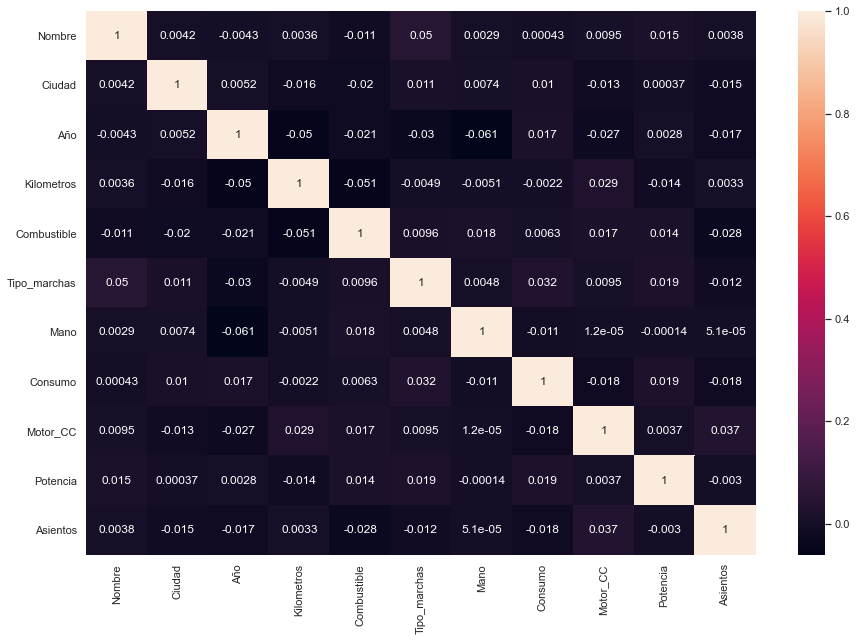

In [35]:
matriz_correlacion = data_trainCopia.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

In [36]:
arbNor = tree.DecisionTreeClassifier()
arbolEntrenado = arbNor.fit(data_trainCopia, target_train)
predADnor = arbolEntrenado.predict(data_testCopia)

scores = cross_val_score(arbolEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Vaidacion Cruzada", np.mean(scores)*100)

Score Vaidacion Cruzada 29.35416666666667


In [37]:
#Random Forests
forests = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
forestEntrenado = forests.fit(data_trainCopia, target_train)
preFo = forestEntrenado.predict(data_testCopia)

scores = cross_val_score(forestEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Vaidacion Cruzada", np.mean(scores)*100)

Score Vaidacion Cruzada 38.22916666666666


In [38]:
xgbclf = xgb.XGBClassifier(max_depth=15, n_estimators = 2000, learning_rate=0.05, n_jobs=-1)
xgbEntrenado = xgbclf.fit(data_trainCopia, target_train)
prexgb = xgbEntrenado.predict(data_testCopia)

scores = cross_val_score(xgbEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)


C:\Users\quesa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\quesa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [24]:
lgbm = lgb.LGBMClassifier(objective='regression_l1',n_estimators=200,n_jobs=2)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 39.27487400069517


In [ ]:
#Bagging meta-estimator
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.95, max_features=0.95, warm_start=True)
bagEntrenado = bagging.fit(data_trainCopia, target_train)
preBag = bagEntrenado.predict(data_testCopia)

scores = cross_val_score(bagEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [ ]:
                          
lgbm = lgb.LGBMClassifier(objective='multiclassova',n_estimators=2765,n_jobs=2, learning_rate=0.99, num_leaves=32, max_bin=300,random_state=77765614)


In [ ]:
#
bagging = BaggingClassifier(base_estimator=xgbclf, n_estimators=35, n_jobs=2, bootstrap=False, random_state=77765614)

bagginglgbmEntrenado = bagging.fit(data_trainCopia, target_train)
preKnn = bagginglgbmEntrenado.predict(data_testCopia)

scores = cross_val_score(bagginglgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [4]:
dfAux = pd.DataFrame({'id':data_test['id']})
dfAux.set_index('id', inplace=True)
dfFinal = pd.DataFrame({'id': data_test['id'], 'Precio_cat': preKnn}, columns=['id', 'Precio_cat'])
dfFinal.set_index('id', inplace=True)
dfFinal.to_csv("./soluciones/solucionXGBMulticlase.csv")

In [ ]:
lgbm = lgb.LGBMClassifier(objective='regression_l1',n_estimators=200,n_jobs=-1)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preLgb = lgbmEntrenado.predict(data_testCopia)

scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [ ]:
lgbm = lgb.LGBMClassifier(objective='multiclassova',n_estimators=200,n_jobs=-1)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preLgb = lgbmEntrenado.predict(data_testCopia)

dfAux = pd.DataFrame({'id':data_test['id']})
dfAux.set_index('id', inplace=True)
dfFinal = pd.DataFrame({'id': data_test['id'], 'Precio_cat': preLgb}, columns=['id', 'Precio_cat'])
dfFinal.set_index('id', inplace=True)
dfFinal.to_csv("./soluciones/8302lgbm-Multiclass18-12.csv")

scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [ ]:
#Random Forests
forests = RandomForestClassifier(n_estimators=15, max_depth=100,min_samples_split=2, random_state=77765614)
forestEntrenado = forests.fit(data_trainCopia, target_train)
preFo = forestEntrenado.predict(data_testCopia)

scores = cross_val_score(forestEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Vaidacion Cruzada", np.mean(scores)*100)

In [ ]:
#Bagging meta-estimator
lgbm = lgb.LGBMClassifier(objective='multiclassova',n_estimators=200,n_jobs=2)
bagging = BaggingClassifier(base_estimator=lgbm, n_estimators=35, n_jobs=2, bootstrap=False, random_state=77765614)
bagEntrenado = bagging.fit(data_trainCopia, target_train)
preBag = bagEntrenado.predict(data_testCopia)

scores = cross_val_score(bagEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

dfAux = pd.DataFrame({'id':data_test['id']})
dfAux.set_index('id', inplace=True)
dfFinal = pd.DataFrame({'id': data_test['id'], 'Precio_cat': preLgb}, columns=['id', 'Precio_cat'])
dfFinal.set_index('id', inplace=True)
dfFinal.to_csv("./soluciones/solucionNOCHE16.csv")

In [ ]:
matriz_correlacion = data_trainCopia.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

In [ ]:
#Bagging meta-estimator
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.95, max_features=0.95, warm_start=True)
bagEntrenado = bagging.fit(data_trainCopia, target_train)
preBag = bagEntrenado.predict(data_testCopia)

scores = cross_val_score(bagEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [ ]:
#
bagging = BaggingClassifier(base_estimator=xgbclf, n_estimators=35, n_jobs=2, bootstrap=False, random_state=77765614)

bagginglgbmEntrenado = bagging.fit(data_trainCopia, target_train)
preKnn = bagginglgbmEntrenado.predict(data_testCopia)

scores = cross_val_score(bagginglgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

In [ ]:
lgbm = lgb.LGBMClassifier(objective='regression_l1',n_estimators=180, n_jobs=2, learning_rate=0.07, num_leaves=35)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preLgb = lgbmEntrenado.predict(data_testCopia)

scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)